In [1]:
#Importing all the libraries to use for the assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. A piece of paper is 1mm thick. Assuming you can fold it as many
times as you want, how many folds would it take to exceed the
height of Mount Everest at 8,848 m?

In [20]:
#For every fold, the height of the paper will double exponentially. 
#The goal here is to loop through n iterations of an exponential increment on two until we exceed 8,848,000 mm

num_folds = 0
val_height = 0
#The value of 8,848m in mm is 8848000
target_height = 8848000

while (val_height < target_height):
    val_height = 2**num_folds
    if(val_height < target_height):
        num_folds += 1
    else:
        print(str(num_folds)+" folds")

24 folds


2. The volume of water in a reservoir decreases at an exponential rate, following v(t) = v(0)exp(-at) with a=0.1. How much time, t, does it take for the volume to decrease to less than one half of its initial volume, v(0)?

In [21]:
#The time at which the volume will be less than half its initial value is represented by
#0.5 = e -0.1t
#Introduce ln on both sides to get the final value of t
#t = ln0.5 / -0.1

t = np.log(0.5) / -0.1
print(str(round(t,2))+" units of time")

6.93 units of time


3. If you deposit \\$100 in a bank account that offers an annualized interest rate of 5% (compounded annually), how much money will you have (round to the \\$) after one, two, three, four and five years?

In [22]:
#Here, we use the formula below to calculate the money accumulated:
#A = P(1+r/n)**nt
#Since it is accumulated once a year, our value of n is always 1

principal = 100
rate = 5/100
year = 1
while(year <= 5):
    accumulated_amount = principal * (1 + rate)**year
    print("After "+str(year)+" years: $"+str(round(accumulated_amount)))
    year+=1

After 1 years: $105
After 2 years: $110
After 3 years: $116
After 4 years: $122
After 5 years: $128


4. Suppose you want to buy a car worth \\$20,000. A financial institution can provide a loan with a monthly interest rate of 1%. What is the monthly payment to pay off the debt in one, two and three years (rounded to the nearest \\$)?

In [23]:
#Here, we use the formula below to calculate the monthly payments:
#A = rP / 1-(1+r)**-n
#Where r is the rate, P is the loan amount and n is the number of months
#the payment is to be made

loan = 20000
rate = 1/100
year = 1
while(year <= 3):
    period = 12* year*-1
    denominator = 1 - (1+rate)**period
    monthly_payment_amount = loan * rate / denominator
    print("Monthly payment for "+str(year)+" years: $"+str(round(monthly_payment_amount)))
    year+=1

Monthly payment for 1 years: $1777
Monthly payment for 2 years: $941
Monthly payment for 3 years: $664


5. You are about to set up a new business and will invest \\$100,000. On day one you expect to have 100 customers and the number of customers will grow at a rate of 1% per day. If each customer provides profits of \\$10, how many days will it take to repay your initial investment based on cumulated profits? Plot cumulated profits per day, show initial investment and mark breakeven day.

Breakeven is after 69.66 days


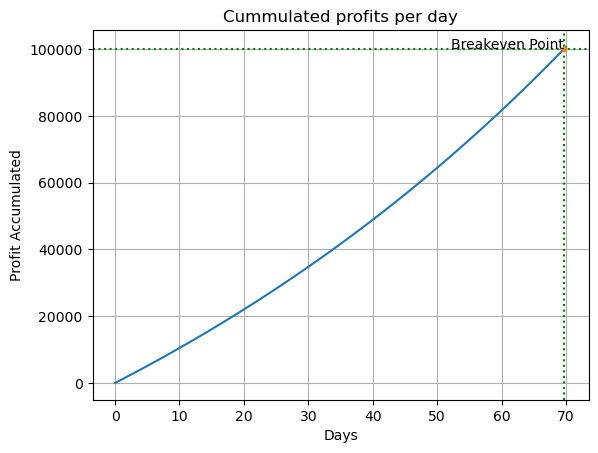

In [24]:
#The solution is to calculate the daily profit accumulated until the figure exceeds the investment
#Add the daily profit to a list, and the days taken to realize the profit to another list
#Use matplotlib to plot the cummulated profits per day

investment = 100000
num_customers = 100
rate = 1/100
profit = 0
days = 0
customer_daily_increment = rate * num_customers
profit_list = [profit]
day_list = [days]
while(profit < investment):
    profit += num_customers * 10
    num_customers += num_customers * rate
    days += 1
    profit_list.append(profit)
    day_list.append(days)
    
breakeven_day = np.interp(investment,profit_list,day_list)
print("Breakeven is after "+str(round(breakeven_day,2))+" days")
    
plt.title("Cummulated profits per day")
plt.xlabel("Days")
plt.ylabel("Profit Accumulated")
plt.axhline(y = investment, color = 'g', linestyle = ':')
plt.axvline(x = breakeven_day, color = 'g', linestyle = ':')
plt.plot(day_list,profit_list)
plt.plot(breakeven_day, investment,".")
plt.grid()
plt.text(breakeven_day, investment,"Breakeven Point",horizontalalignment='right')
plt.show()

6. Using data from http://bit.ly/1JJyf29 and linear interpolation, estimate the dates when the number of cases and deaths due to
Ebola exceeded 100, 500, 1000, 2000 and 5000. Graph the cases and deaths (observations and interpolations) and mark the dates when thresholds were exceeded with a circle.

In [7]:
#Load the data from the excel file
main_df = pd.read_excel('ebola_download.xls')
#Convert the datatype of the date column to DateTime
main_df["Date"] = pd.to_datetime(main_df["Date"])
#Create a new dataframe with the minimum and maximum dates from the main dataframe
new_dates_df = pd.DataFrame(pd.date_range(main_df["Date"].min(),main_df["Date"].max(),freq='D'),columns=["Date"])
#Merge the two dataframes
merged_ebola_df = pd.merge(new_dates_df,main_df, on="Date",how="left")
#Set the date as the new index on the new dataframe
merged_ebola_df = merged_ebola_df.set_index('Date')
#Interpolate the data on the new dataframe
merged_ebola_df = merged_ebola_df.interpolate()

In [25]:
#This list holds the number of cases and deaths to be checked
num_dataset = [100,500,1000,2000,5000]
#This function selects the indices in the dataframes for the number of cases and deaths
#and returns them in a list
def select_indices(dataframe, col):
    index_list = []
    for num in num_dataset:
        date = dataframe.loc[dataframe[col] > num].index[0]
        index_list.append(date)
        print(str(num)+" on "+date.strftime("%b %d %Y"))
    return index_list

In [26]:
#Select the indices from the cases and deaths dataframes using the select_indices function specified above
cases_df = pd.DataFrame(merged_ebola_df['Cases'])
print("Ebola cases exceeded: ")
cases_indices = select_indices(cases_df,"Cases")

death_df = pd.DataFrame(merged_ebola_df['Death'])
print("Ebola deaths exceeded: ")
death_indices = select_indices(death_df,"Death")

Ebola cases exceeded: 
100 on Mar 27 2014
500 on Jun 13 2014
1000 on Jul 15 2014
2000 on Aug 12 2014
5000 on Sep 12 2014
Ebola deaths exceeded: 
100 on Apr 06 2014
500 on Jul 05 2014
1000 on Aug 09 2014
2000 on Sep 03 2014
5000 on Oct 24 2014


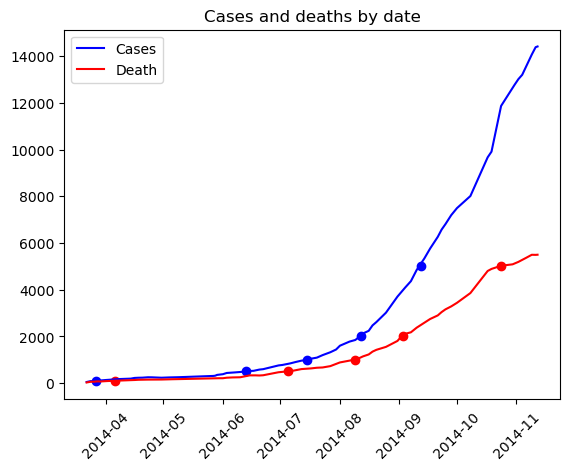

In [10]:
plt.title("Cases and deaths by date")
plt.plot(merged_ebola_df.index,merged_ebola_df["Cases"],color="b",label="Cases")
plt.scatter(cases_indices,num_dataset,color="b",marker="o")
plt.plot(merged_ebola_df.index,merged_ebola_df["Death"],color="r",label="Death")
plt.scatter(death_indices,num_dataset,color="r",marker="o")
plt.xticks(rotation = 45)
plt.legend(loc=0)
plt.show()

7. Using data from 2014, downloaded in the previous question, what is the average growth rate per day, as a percentage, in the number of Ebola cases and deaths?

In [11]:
#Calculate the percentage change from the 'Cases' column on the dataframe using the inbuilt pct_change() function
df_cases_rate_change = cases_df['Cases'].pct_change()*100
print("Percentage change of cases: %.2f%%" % (df_cases_rate_change.mean()))

Percentage change of cases: 2.51%


In [12]:
#Calculate the percentage change from the 'Death' column on the dataframe using the inbuilt pct_change() function
df_death_rate_change = death_df['Death'].pct_change()*100
print("Percentage change of deaths: %.2f%%" % (df_death_rate_change.mean()))

Percentage change of deaths: 2.33%


8. Using the same date, plot the number of deaths versus the number of cases and estimate the average ratio of Ebola deaths to cases.

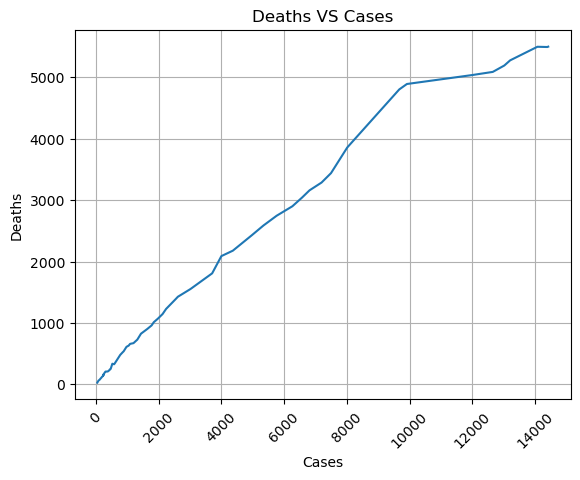

In [13]:
#Plot a graph of cases against deaths
plt.title("Deaths VS Cases")
plt.plot(merged_ebola_df['Cases'],merged_ebola_df['Death'])
plt.xlabel("Cases")
plt.ylabel("Deaths")
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [14]:
#Calculate the ratio of deaths to cases
merged_ebola_df['Death - Case Ratio'] = merged_ebola_df['Death'] / merged_ebola_df['Cases']
print("Ebola death to case ratio : %.2f" % (merged_ebola_df['Death - Case Ratio'].mean()))

Ebola death to case ratio : 0.56


9. Obtain daily prices for two ETFs called ‘SPY’ and ‘TLT’ which track the S&P500 index and long-term Treasury Bond. Select the
adjusted closing prices. Plot the two time series during 01/01/2014 – 08/31/2015 and make them comparable by starting from prices of $100 on the first day in 01/01/2014 – 08/31/2015.

In [15]:
#Initialize the start and end dates to check
start_date = pd.to_datetime('01/01/2014')
end_date = pd.to_datetime('08/31/2015')

#This function normalizes a row in a dataframe
def normalize_row(x, index):
    return (x/index) * 100

#Load the data from SPY.CSV
spy_stock_data_df = pd.read_csv('SPY.csv')
#Convert the 'Date' column to a datetime
spy_stock_data_df['Date'] = pd.to_datetime(spy_stock_data_df['Date'])

#Extract data for the start and end dates specified
spy_date_compare_df = (spy_stock_data_df['Date'] >= start_date) & (spy_stock_data_df['Date'] <= end_date)
spy_date_df = spy_stock_data_df.loc[spy_date_compare_df]

#Set the index of the dataframe as the 'Date' column
spy_stock_df = spy_date_df.set_index('Date')
#Select the 'Adj Close' column from the entire dataframe for normalization
spy_close_df = pd.DataFrame(spy_stock_df['Adj Close'])
#Get the first item in the dataframe to use for normalizing the data
spy_first_index = spy_close_df.iloc[0]['Adj Close']
#Normalize the records in 'Adj Close'. This is what will be plotted on the graph
spy_normalized_close_df = spy_close_df['Adj Close'].apply(normalize_row, args = (spy_first_index,))

In [16]:
#Load the data from SPY.CSV
tlt_stock_data_df = pd.read_csv('TLT.csv')
#Convert the 'Date' column to a datetime
tlt_stock_data_df['Date'] = pd.to_datetime(tlt_stock_data_df['Date'])

#Extract data for the start and end dates specified
tlt_date_compare_df = (tlt_stock_data_df['Date'] >= start_date) & (tlt_stock_data_df['Date'] <= end_date)
tlt_date_df = tlt_stock_data_df.loc[tlt_date_compare_df]

#Set the index of the dataframe as the 'Date' column
tlt_stock_df = tlt_date_df.set_index('Date')
#Select the 'Adj Close' column from the entire dataframe for normalization
tlt_close_df = pd.DataFrame(tlt_stock_df['Adj Close'])

#Get the first item in the dataframe to use for normalizing the data
tlt_first_index = tlt_close_df.iloc[0]['Adj Close']
#Normalize the records in 'Adj Close'. This is what will be plotted on the graph
tlt_normalized_close_df = tlt_close_df['Adj Close'].apply(normalize_row, args = (tlt_first_index,))

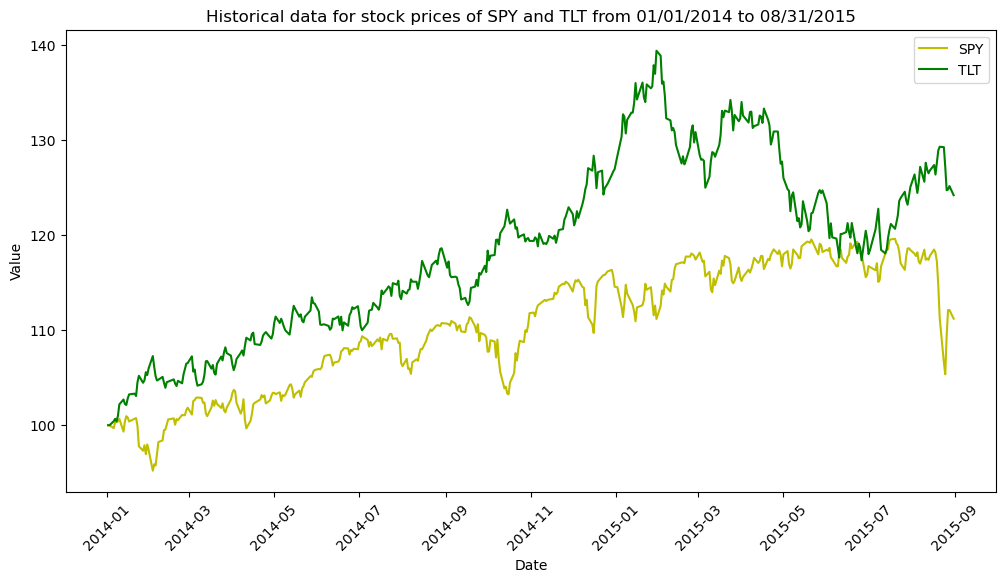

In [17]:
#Plot the data from the two dataframes on a graph
plt.figure(figsize=(12,6))
plt.title("Historical data for stock prices of SPY and TLT from 01/01/2014 to 08/31/2015")
plt.xlabel("Date")
plt.ylabel("Value")
plt.plot(spy_normalized_close_df, label='SPY', color="y")
plt.plot(tlt_normalized_close_df, label='TLT', color="g")
plt.xticks(rotation = 45)
plt.legend(loc=0)
plt.show()

10. For the ETFs on the previous question, calculate daily returns, r(t) = p(t)/p(t-1)-1, for each trading day in the same time period as above. Calculate the average, min and max daily return for each of the two ETFs during the time period and express these as percentages.

In [18]:
#Use the formula shared to create a 'Daily Return' column on the dataframe
spy_close_df['Daily Return'] = (spy_close_df['Adj Close'] / spy_close_df['Adj Close'].shift(1)) - 1
tlt_close_df['Daily Return'] = (tlt_close_df['Adj Close'] / tlt_close_df['Adj Close'].shift(1)) - 1

In [19]:
#Print the average, min and max daily returns for SPY and TLT based on the returns in the dataframes
print("SPY Minimum daily return: "+ "%.2f%%" % (spy_close_df['Daily Return'].min()*100))
print("SPY Maximum daily return: "+ "%.2f%%" % (spy_close_df['Daily Return'].max()*100))
print("SPY Average daily return: "+ "%.2f%%" % (spy_close_df['Daily Return'].mean()*100))

print("TLT Minimum daily return: "+ "%.2f%%" % (tlt_close_df['Daily Return'].min()*100))
print("TLT Maximum daily return: "+ "%.2f%%" % (tlt_close_df['Daily Return'].max()*100))
print("TLT Average daily return: "+ "%.2f%%" % (tlt_close_df['Daily Return'].mean()*100))

SPY Minimum daily return: -4.21%
SPY Maximum daily return: 3.84%
SPY Average daily return: 0.03%
TLT Minimum daily return: -2.43%
TLT Maximum daily return: 2.65%
TLT Average daily return: 0.06%
